<style>
h1 {
  color: #0078d4
}
</style>
<h1>Classification algorithms
</h1>

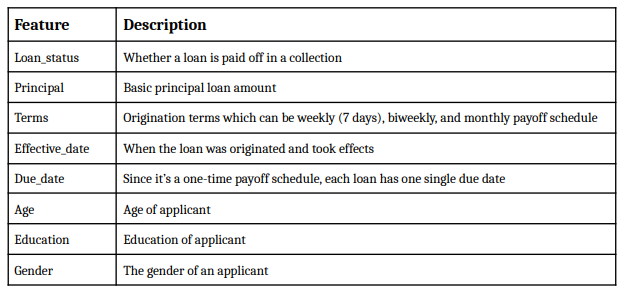

Questions:

2. Classification Algorithms:
Implement four different classification algorithms of your choice (e.g., Logistic
Regression, K-Nearest Neighbors, Decision Tree, and Support Vector Machine, etc.).
3. Performance Evaluation:
Evaluate the performance of each classification algorithm using relevant metrics,
such as the confusion matrix, accuracy, precision, recall, F1-score, and a detailed
classification report. Discuss the results.
4. Hyperparameter Tuning:
Use GridSearchCV to perform hyperparameter tuning for each algorithm. Compare
the performance of the optimized models with the initial results from Question 3
using the same metrics.
5. Ensemble Learning:
Train a Decision Tree Classifier using the bagging technique. Compare its
performance with that of a Random Forest Classifier, focusing on their strengths and
weaknesses.
6. Future Predictions:
Based on the evaluation results, identify the most performant model. Use this model
to make predictions on future observations or unseen data and provide insights into
its practical application.

<style>
h3 {
 color: #0078d4
}
</style>
<h3>1. Dataset Preparation:
Load and preprocess the dataset. Ensure data is clean and ready for analysis,
handling any missing values, outliers, or data imbalances as necessary.</h3>

In [103]:
import pandas as pd

In [104]:
#Importing the dataset
df = pd.read_csv("loan_train.csv", sep=',')

In [105]:
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [106]:
#printing info about columns
#it shows column names, number of rows, data types and number of null values per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    346 non-null    int64 
 1   Unnamed: 0      346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


In [107]:
#describe gives insight about data frame as  min and max, middle, and quartile values per column...
print(df.describe(include='all'))

        Unnamed: 0.1  Unnamed: 0 loan_status    Principal       terms  \
count     346.000000  346.000000         346   346.000000  346.000000   
unique           NaN         NaN           2          NaN         NaN   
top              NaN         NaN     PAIDOFF          NaN         NaN   
freq             NaN         NaN         260          NaN         NaN   
mean      202.167630  202.167630         NaN   943.641618   22.653179   
std       115.459715  115.459715         NaN   109.425530    7.991006   
min         0.000000    0.000000         NaN   300.000000    7.000000   
25%       107.250000  107.250000         NaN   900.000000   15.000000   
50%       204.500000  204.500000         NaN  1000.000000   30.000000   
75%       298.750000  298.750000         NaN  1000.000000   30.000000   
max       399.000000  399.000000         NaN  1000.000000   30.000000   

       effective_date    due_date         age             education Gender  
count             346         346  346.000000 

In [108]:
#those colors will be used to display plots
colors = ["#19647E", "#FF6F61", '#B7C3F3', '#DD7596', '#8EB897', '#F9CDAD', '#F8AFA8', '#A8D0E6', '#8A5575', '#D8B56B']

In [109]:
#droping one of 2 unnamed columns, second will be renamed as customer id as that must be in this case
df = df.drop(['Unnamed: 0.1'], axis=1).copy()
df = df.rename(columns={'Unnamed: 0': 'customer_id'}).copy()

In [110]:
df= df.replace('High School or Below', 'Secondary or Below')
df= df.replace('Bechalor', 'Tertiary')
df= df.replace('college', 'Tertiary')
df= df.replace('Master or Above', 'Postgraduate')

In [111]:
#displaying count of loean amount less than 750 and deleting outliers
print(df[df['Principal'] < 800].shape[0])
df = df.drop(df[df['Principal'] < 800].index)

5


In [112]:
#printing all unique values for Principal coumn and deliting outliers
print(df['Principal'].value_counts())
df = df.drop(df[df['Principal'] == 900].index)

Principal
1000    258
800      81
900       2
Name: count, dtype: int64


In [113]:
#displaying unique values for term and displaying how many data points each value has
#after that removing outliers
print(df['terms'].value_counts())
df = df.drop(df[df['terms'] == 7].index)

terms
30    184
15    146
7       9
Name: count, dtype: int64


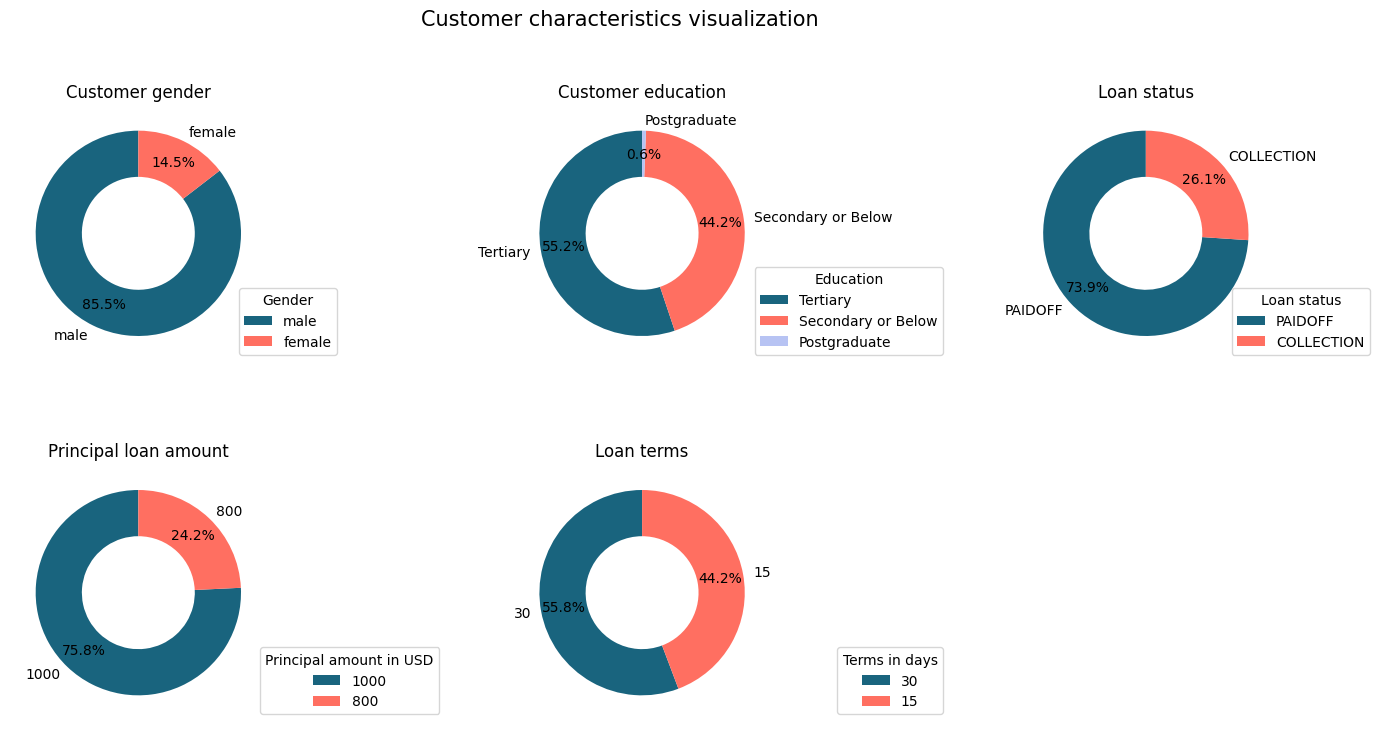

In [114]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(18, 8))
axs = axs.flatten()

#plotting gender on pie chart
gender_counts = df['Gender'].value_counts()
labels = gender_counts.index
axs[0].pie(df['Gender'].value_counts(), colors=colors, labels= labels ,autopct='%1.1f%%', startangle=90,  wedgeprops=dict(width=0.45), pctdistance=0.77)
axs[0].set_title("Customer gender")
axs[0].legend(title="Gender", loc='lower right', bbox_to_anchor=(1.3, 0))

education_counts = df['education'].value_counts()
labels = education_counts.index
axs[1].pie(df['education'].value_counts(), colors=colors, labels= labels ,autopct='%1.1f%%', startangle=90,  wedgeprops=dict(width=0.45), pctdistance=0.77)
axs[1].set_title("Customer education")
axs[1].legend(title="Education", loc='lower right', bbox_to_anchor=(1.7, 0))

loan_status_counts = df['loan_status'].value_counts()
labels = loan_status_counts.index
axs[2].pie(df['loan_status'].value_counts(), colors=colors, labels= labels ,autopct='%1.1f%%', startangle=90,  wedgeprops=dict(width=0.45), pctdistance=0.77)
axs[2].set_title("Loan status")
axs[2].legend(title="Loan status", loc='lower right', bbox_to_anchor=(1.4, 0))

principal_counts = df['Principal'].value_counts()
labels = principal_counts.index
axs[3].pie(df['Principal'].value_counts(), colors=colors, labels= labels ,autopct='%1.1f%%', startangle=90,  wedgeprops=dict(width=0.45), pctdistance=0.77)
axs[3].set_title("Principal loan amount")
axs[3].legend(title="Principal amount in USD", loc='lower right', bbox_to_anchor=(1.7, 0))

terms_counts = df['terms'].value_counts()
labels = terms_counts.index
axs[4].pie(df['terms'].value_counts(), colors=colors, labels= labels ,autopct='%1.1f%%', startangle=90,  wedgeprops=dict(width=0.45), pctdistance=0.77)
axs[4].set_title("Loan terms")
axs[4].legend(title="Terms in days", loc='lower right', bbox_to_anchor=(1.7, 0))

axs[5].axis('off')

plt.suptitle("Customer characteristics visualization", fontsize=15, y=1.0)
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()


In [118]:
#displaying age count for age over 45 and less than 21 and droping them
print(df[df['age'] > 45].shape[0])
print(df[df['age'] < 21].shape[0])

df = df.drop(df[df['age'] > 45].index)
df = df.drop(df[df['age'] < 20].index)

7
6


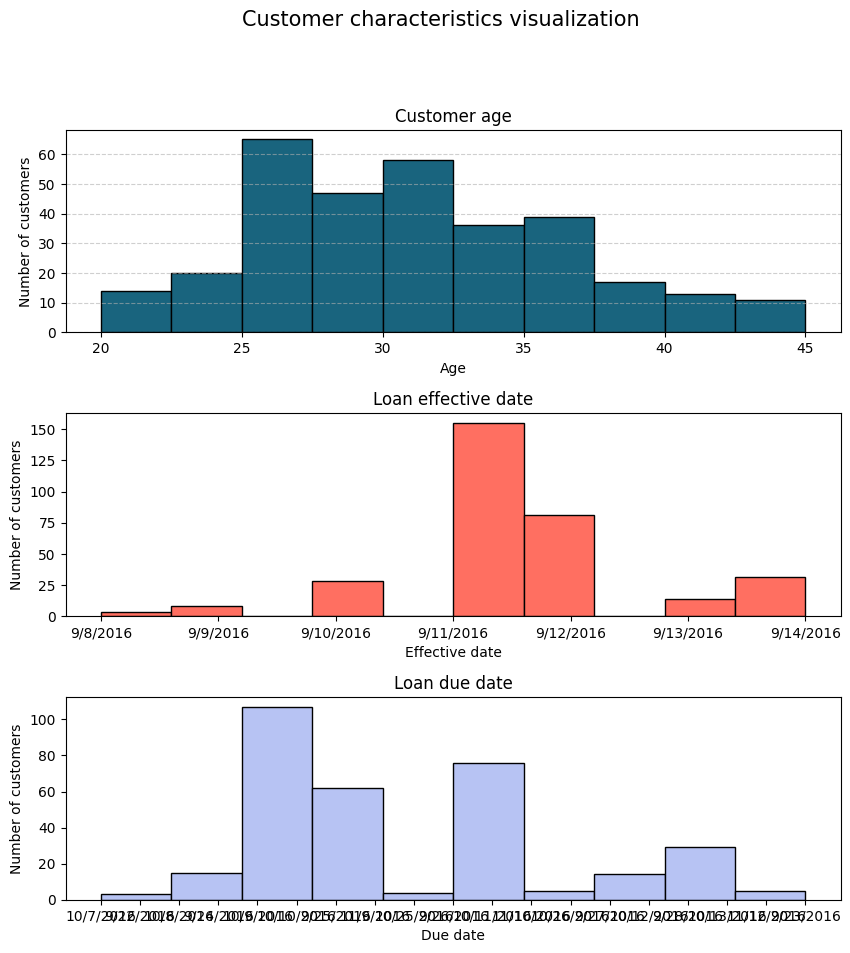

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
axs = axs.flatten()

axs[0].hist(df['age'], bins=10, color=colors[0], edgecolor='black')
axs[0].set_title("Customer age")
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Number of customers")
axs[0].grid(axis='y', linestyle='--', alpha=0.6)

axs[1].hist(df['effective_date'], color=colors[1], edgecolor='black')
axs[1].set_title("Loan effective date")
axs[1].set_xlabel("Effective date")
axs[1].set_ylabel("Number of customers")


axs[2].hist(df['due_date'], color=colors[2], edgecolor='black')
axs[2].set_title("Loan due date")
axs[2].set_xlabel("Due date")
axs[2].set_ylabel("Number of customers")

plt.suptitle("Customer characteristics visualization", fontsize=15, y=1.0)
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()